In [3]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data_emotion = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_data_emotion.flow_from_directory(
    r'C:\Users\Dinesh\PycharmProjects\pythonProject1\emotion_data\train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale", 
    class_mode="categorical"
)

test_generator = train_data_emotion.flow_from_directory(
    r'C:\Users\Dinesh\PycharmProjects\pythonProject1\emotion_data\test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale", 
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))  # Update input_shape
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Conv2D(64, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Conv2D(128, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Flatten())
emotion_model.add(Dense(128, activation='relu'))
emotion_model.add(Dense(7, activation='softmax'))

c:\users\dinesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

c:\users\dinesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
history = emotion_model.fit(train_generator,
                    steps_per_epoch= 28709 // 64,
                    epochs = 40,
                    validation_data= test_generator,
                    validation_steps= 7178//64)

Epoch 1/40


c:\users\dinesh\appdata\local\programs\python\python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 215s 473ms/step - accuracy: 0.2777 - loss: 1.7652 - val_accuracy: 0.4446 - val_loss: 1.4584
Epoch 2/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - accuracy: 0.4062 - loss: 1.3913 - val_accuracy: 0.5000 - val_loss: 1.4279
Epoch 3/40


c:\users\dinesh\appdata\local\programs\python\python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.4658 - loss: 1.4078 - val_accuracy: 0.4923 - val_loss: 1.3232
Epoch 4/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.3594 - loss: 1.4740 - val_accuracy: 0.1000 - val_loss: 1.8781
Epoch 5/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.5222 - loss: 1.2801 - val_accuracy: 0.5109 - val_loss: 1.2649
Epoch 6/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.5156 - loss: 1.3326 - val_accuracy: 0.4000 - val_loss: 1.4462
Epoch 7/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.5575 - loss: 1.1833 - val_accuracy: 0.5269 - val_loss: 1.2353
Epoch 8/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.6562 - loss: 0.8604 - val_accuracy: 0.3000 - val_loss: 1.7723
Epoch 9/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.5755 - loss: 1.1204 - val_accuracy: 0.5465 - val_loss: 1.1941
Epoch 10/40
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 62us/step - accuracy: 0.6094 - loss: 1.0704 - val_accuracy: 

In [9]:
model_json = emotion_model.to_json()
with open("emotion_model.json","w") as json_file:
    json_file.write(model_json)

In [10]:
emotion_model.save('emotion_model_weights.h5')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
history_detect = emotion_model.history.history
history_df = pd.DataFrame(history_detect)

<function matplotlib.pyplot.show(close=None, block=None)>

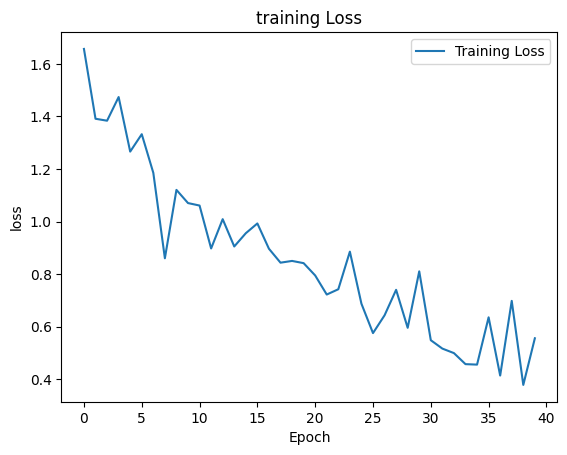

In [13]:
plt.plot(history_df['loss'], label='Training Loss')
plt.title('training Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show

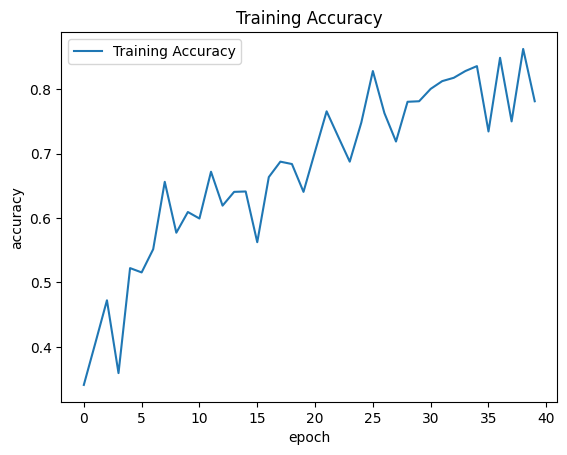

In [14]:
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()